In [5]:
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from mlfinlab.networks.visualisations import generate_pmfg_server, generate_mst_server, generate_central_peripheral_ranking
from mlfinlab.networks.pmfg import PMFG 
from mlfinlab.networks.mst import MST
from mlfinlab.networks.dash_graph import DashGraph, PMFGDash

train_start = '2000-01-01'
train_stop = '2023-01-01'

In [13]:
asset_files = ['TLT', 'GLD', 'SLV',
               'XLB', 'XLE', 'XLF',
               'XLI', 'XLK', 'XLI',
               'XLK', 'XLP', 'XLU',
               'XLV', 'XLY']

df = pd.DataFrame()

for file in asset_files:
    filename = file + '.csv'
    temp = pd.read_csv(filename)
    temp.set_index(keys='date', drop=True, inplace=True)
    
    log_rets = temp['close'].apply(np.log).diff(1) # convert price series into log returns series
    df[file] = log_rets
    
df = df[df.index > train_start]
df = df[df.index < train_stop]
df.dropna(how='any', axis='rows', inplace=True)
df

,TLT,GLD,SLV,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,,
2006-05-01,-0.011472,0.001075,0.004190,0.006546,0.016317,-0.015730,0.002603,-0.008272,-0.000420,-0.009302,-0.008751,-0.005589
2006-05-02,0.002641,0.021108,0.035066,0.009739,0.021968,0.006262,0.008055,0.004604,0.005860,0.015985,0.000000,0.000885
2006-05-03,-0.002160,-0.001353,-0.031109,0.000294,-0.015617,-0.000892,0.000286,-0.002299,-0.006700,-0.003177,-0.011129,0.002649
2006-05-04,-0.001683,0.015231,0.005372,0.009933,-0.004630,0.002081,0.011959,0.003676,0.001679,0.001272,0.003286,0.005569
2006-05-05,0.005999,0.007529,-0.000357,0.006952,0.011620,0.014151,0.009858,0.005490,0.009186,0.022310,0.009794,0.011625
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-03,-0.026601,-0.015503,-0.015461,-0.013108,0.030520,0.012217,-0.008256,0.009445,-0.000130,-0.009968,-0.010345,0.028308
2022-01-04,-0.004167,0.007340,0.006588,0.012225,0.034018,0.025969,0.019907,-0.010654,0.006722,-0.003109,-0.013283,-0.006105
2022-01-05,-0.005443,-0.003012,-0.015123,-0.000110,-0.000169,-0.011653,-0.009574,-0.031232,-0.000902,-0.000566,-0.007148,-0.027352


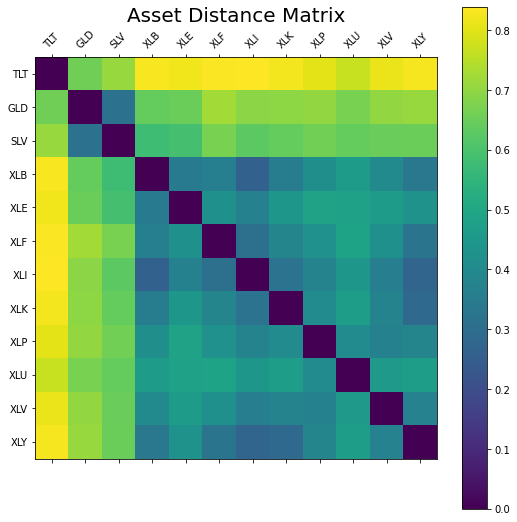

In [25]:
corr_mat = assets_close_prices.corr(method='pearson') # pearson correlation matrix
dist_mat = (0.5 * (1 - corr_mat)) ** 0.5 # angular distance matrix (Using this for a long only portfolio. We would use absolute or squared angular distance for a long-short portfolio)

# Plot distance matrix
f = plt.figure(figsize=(9, 9))
plt.matshow(dist_mat, fignum=f.number)
plt.xticks(range(dist_mat.select_dtypes(['number']).shape[1]), dist_mat.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(dist_mat.select_dtypes(['number']).shape[1]), dist_mat.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Asset Distance Matrix', fontsize=20);

In [26]:
pmfg_dist = PMFG(dist_mat, "distance")
pmfg_graph_distance = pmfg_dist.get_graph()

ranked_nodes = generate_central_peripheral_ranking(pmfg_graph_distance)

ranked_nodes = pd.DataFrame(ranked_nodes, columns=['Ranking', 'node'])
ranked_nodes

,Ranking,node
0,2.939316,XLU
1,3.386902,TLT
2,4.417825,XLK
3,4.429234,XLP
4,4.896170,GLD
5,5.587315,XLF
6,6.005022,XLV
7,7.513577,XLY
8,7.925007,SLV
9,9.914044,XLE
